### Tercera hipótesis: ¿Es posible que esté relacionado el tiempo de trabajo de riders y la deuda?

In [2]:
import pandas as pd
from pandasql import sqldf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import gaussian_kde
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

In [3]:
assigned_order = pd.read_csv('../data/Assigned_orders.csv')
completed_order = pd.read_csv('../data/Completed_orders.csv')
courier_debt = pd.read_csv('../data/Courier_debt.csv')

In [4]:
courier_debt['rider_id'] = courier_debt['rider_id'].str.replace('id', 'id_')

In [5]:
courier_debt['first_online_date'] = pd.to_datetime(courier_debt['first_online_date'])
courier_debt['last_online_date'] = pd.to_datetime(courier_debt['last_online_date'], format='%Y%m%d')

In [6]:
courier_debt.head()

,rider_id,first_online_date,vehicle_type,last_online_date,debt_2022-10,debt_2022-11,debt_2022-12,debt_2023-01,debt_2023-02,debt_2023-03
0,id_5764607523772434582,2020-08-08,bicycles,2023-03-01,-405.01,-412.28,-936.76,-1020.68,-593.89,-1088.69
1,id_5764607523789211641,2019-12-26,bicycles,2023-01-09,-486.95,-486.95,-486.95,-486.95,-456.50,-456.50
2,id_5764607523910846566,2019-09-28,motorcycles,2023-02-10,0.00,0.00,-196.31,-196.31,-196.31,-340.43
3,id_5764607524099591948,2019-11-04,bicycles,2022-12-06,-801.96,-541.49,-577.76,-254.77,-254.77,-254.77
4,id_5764607524409968722,2019-10-13,bicycles,2022-11-08,-583.36,0.00,0.00,0.00,0.00,0.00


In [7]:
courier_debt['diferencia_dias'] = (courier_debt['last_online_date'] - courier_debt['first_online_date']).dt.days.astype(int)

In [8]:
courier_debt[courier_debt['diferencia_dias']==3]

,rider_id,first_online_date,vehicle_type,last_online_date,debt_2022-10,debt_2022-11,debt_2022-12,debt_2023-01,debt_2023-02,debt_2023-03,diferencia_dias
1028,id_5764607729129754063,2022-09-08,bicycles,2022-09-11,0.0,0.00,0.00,0.00,0.00,0.00,3
1405,id_5764607818732669230,2022-08-31,motorcycles,2022-09-03,0.0,0.00,0.00,0.00,0.00,0.00,3
1482,id_5764607851779591400,2023-01-19,bicycles,2023-01-22,0.0,0.00,0.00,0.00,0.00,0.00,3
1533,id_5764607870846896223,2023-01-15,bicycles,2023-01-18,0.0,0.00,0.00,0.00,0.00,0.00,3
1986,id_5764608083246451684,2022-10-26,bicycles,2022-10-29,0.0,-698.31,-698.31,-698.31,-698.31,-698.31,3
...,...,...,...,...,...,...,...,...,...,...,...
50018,id_5764642657192117573,2023-02-25,motorcycles,2023-02-28,0.0,0.00,0.00,0.00,0.00,0.00,3
50040,id_5764642663877837359,2023-02-21,bicycles,2023-02-24,0.0,0.00,0.00,0.00,0.00,-1250.92,3
50062,id_5764642670798440369,2023-02-25,bicycles,2023-02-28,0.0,0.00,0.00,0.00,0.00,-1346.29,3
50074,id_5764642673558292473,2023-02-22,bicycles,2023-02-25,0.0,0.00,0.00,0.00,0.00,-1071.81,3


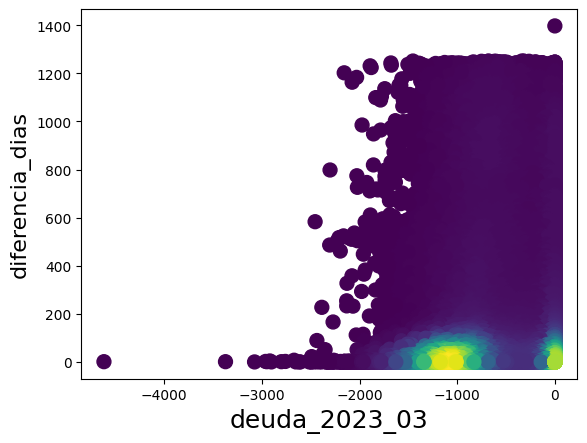

In [9]:
xy = np.vstack([courier_debt['debt_2023-03'],courier_debt['diferencia_dias']])
z = gaussian_kde(xy)(xy)
fig, ax = plt.subplots()
ax.scatter(courier_debt['debt_2023-03'], courier_debt['diferencia_dias'], c=z, s=100)
plt.xlabel('deuda_2023_03', fontsize=18)
plt.ylabel('diferencia_dias', fontsize=16)
plt.show()

Al parecer la mayoría de riders con deudas se encuentran alrededor de los -1000 o 0 y son los que menos días de trabajo tienen. Además, las deudas más altas las tienen los riders que trabajan menos días

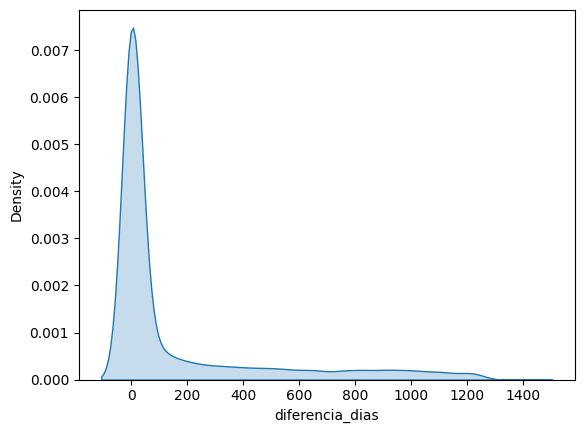

In [10]:
sns.kdeplot(data=courier_debt['diferencia_dias'],fill=True)
plt.show()

In [11]:
courier_debt[courier_debt['diferencia_dias']==0]['debt_2023-03'].sum()

-18257415.25

In [12]:
kmeans = KMeans(n_clusters=3,random_state=3)
kmeans.fit_predict(courier_debt[['diferencia_dias']])
courier_debt['cluster'] = kmeans.labels_
courier_debt

,rider_id,first_online_date,vehicle_type,last_online_date,debt_2022-10,debt_2022-11,debt_2022-12,debt_2023-01,debt_2023-02,debt_2023-03,diferencia_dias,cluster
0,id_5764607523772434582,2020-08-08,bicycles,2023-03-01,-405.01,-412.28,-936.76,-1020.68,-593.89,-1088.69,935,1
1,id_5764607523789211641,2019-12-26,bicycles,2023-01-09,-486.95,-486.95,-486.95,-486.95,-456.50,-456.50,1110,1
2,id_5764607523910846566,2019-09-28,motorcycles,2023-02-10,0.00,0.00,-196.31,-196.31,-196.31,-340.43,1231,1
3,id_5764607524099591948,2019-11-04,bicycles,2022-12-06,-801.96,-541.49,-577.76,-254.77,-254.77,-254.77,1128,1
4,id_5764607524409968722,2019-10-13,bicycles,2022-11-08,-583.36,0.00,0.00,0.00,0.00,0.00,1122,1
...,...,...,...,...,...,...,...,...,...,...,...,...
50197,id_5764642812607856931,2023-02-28,motorcycles,2023-03-01,0.00,0.00,0.00,0.00,0.00,0.00,1,0
50198,id_5764642814579180164,2023-03-01,motorcycles,2023-03-01,0.00,0.00,0.00,0.00,0.00,0.00,0,0
50199,id_5764642857163948332,2023-02-28,motorcycles,2023-02-28,0.00,0.00,0.00,0.00,0.00,0.00,0,0
50200,id_5764642877946725055,2023-03-01,motorcycles,2023-03-01,0.00,0.00,0.00,0.00,0.00,0.00,0,0


In [13]:
courier_debt['cluster'].value_counts()

cluster
0    39266
2     5893
1     5043
Name: count, dtype: int64

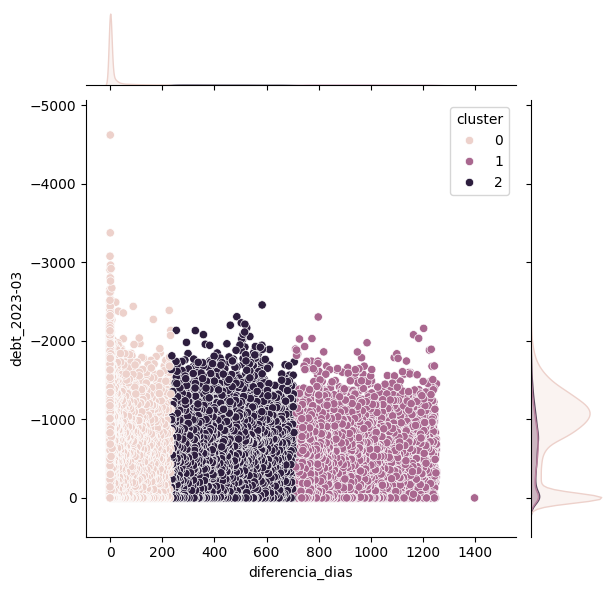

In [14]:
sns.jointplot(data=courier_debt,x='diferencia_dias',y='debt_2023-03',hue='cluster')
plt.gca().invert_yaxis()
plt.show()

In [15]:
courier_debt.groupby('cluster')['debt_2023-03'].sum()

cluster
0   -32792978.21
1    -2906727.10
2    -3635685.08
Name: debt_2023-03, dtype: float64

Si clusterizamos en función a la diferencia de días, podemos apreciar que la mayoría de riders (78%) se encuentra en una proporción menor a 220 días.
Además, **el 83.3% de la deuda se encuentra representada en ese 78% de riders**

Entonces, procederé a trabajar con ese gran grupo de deudas

In [16]:
df_mayoria = courier_debt[courier_debt['diferencia_dias']<=220]

In [17]:
kmeans = KMeans(n_clusters=2,random_state=3)
kmeans.fit_predict(df_mayoria[['diferencia_dias']])
df_mayoria.loc[:, 'cluster']= kmeans.labels_
df_mayoria['cluster'].value_counts()

cluster
1    35137
0     3906
Name: count, dtype: int64

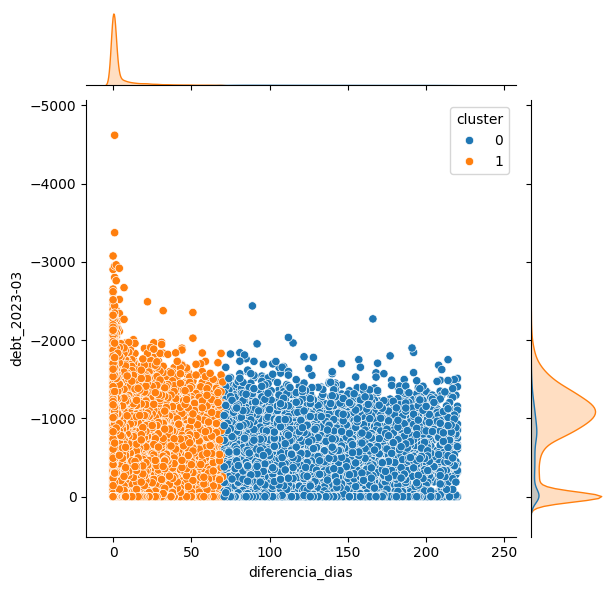

In [18]:
sns.jointplot(data=df_mayoria,x='diferencia_dias',y='debt_2023-03',hue='cluster')
plt.gca().invert_yaxis()
plt.show()

In [19]:
df_mayoria.groupby('cluster')['debt_2023-03'].sum()

cluster
0    -2246007.65
1   -30402560.04
Name: debt_2023-03, dtype: float64

In [20]:
df_mayoria[df_mayoria['cluster']==1].describe()

,first_online_date,last_online_date,debt_2022-10,debt_2022-11,debt_2022-12,debt_2023-01,debt_2023-02,debt_2023-03,diferencia_dias,cluster
count,35137,35137,35137.000000,35137.000000,35137.000000,35137.000000,35137.000000,35137.000000,35137.000000,35137.0
mean,2022-12-17 07:22:36.621225472,2022-12-23 00:18:09.313259520,-82.924229,-166.463815,-270.125763,-449.539405,-677.744640,-865.257707,5.705239,1.0
min,2022-06-25 00:00:00,2022-09-01 00:00:00,-2385.870000,-2652.940000,-2801.460000,-3373.490000,-3373.490000,-4618.510000,0.000000,1.0
25%,2022-11-09 00:00:00,2022-11-15 00:00:00,0.000000,0.000000,-411.960000,-1005.110000,-1161.400000,-1229.480000,0.000000,1.0
50%,2022-12-29 00:00:00,2023-01-02 00:00:00,0.000000,0.000000,0.000000,0.000000,-839.240000,-994.990000,0.000000,1.0
75%,2023-02-02 00:00:00,2023-02-05 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,-519.130000,3.000000,1.0
max,2023-03-01 00:00:00,2023-03-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,1.0
std,NaN,NaN,284.357012,393.174916,477.828781,565.969412,582.419936,523.905604,12.753234,0.0


Otra vez, la mayoría se encuentra una diferencia de días de menor a 70 y el 70.3% de la deuda general se encuentra en este grupo 

In [21]:
df_mayoria_70 = courier_debt[courier_debt['diferencia_dias']<=70]

In [22]:
kmeans = KMeans(n_clusters=2,random_state=3)
kmeans.fit_predict(df_mayoria_70[['diferencia_dias']])
df_mayoria_70.loc[:, 'cluster']= kmeans.labels_
df_mayoria_70['cluster'].value_counts()

cluster
0    31734
1     3403
Name: count, dtype: int64

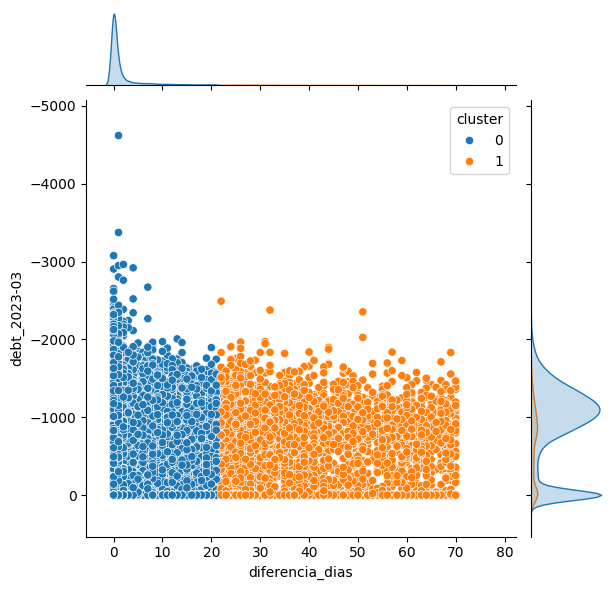

In [23]:
sns.jointplot(data=df_mayoria_70,x='diferencia_dias',y='debt_2023-03',hue='cluster')
plt.gca().invert_yaxis()
plt.show()

In [24]:
df_mayoria_70.groupby('cluster')['debt_2023-03'].sum()

cluster
0   -28165309.64
1    -2237250.40
Name: debt_2023-03, dtype: float64

Del 71.3% de la deuda principal, el 92.3% se encuentra en una diferencia de días menor o igual a 20 días

In [25]:
df_mayoria_70_20 = courier_debt[courier_debt['diferencia_dias']<=20]

In [26]:
kmeans = KMeans(n_clusters=2,random_state=3)
kmeans.fit_predict(df_mayoria_70_20[['diferencia_dias']])
df_mayoria_70_20.loc[:, 'cluster']= kmeans.labels_
df_mayoria_70_20['cluster'].value_counts()

cluster
0    28060
1     3501
Name: count, dtype: int64

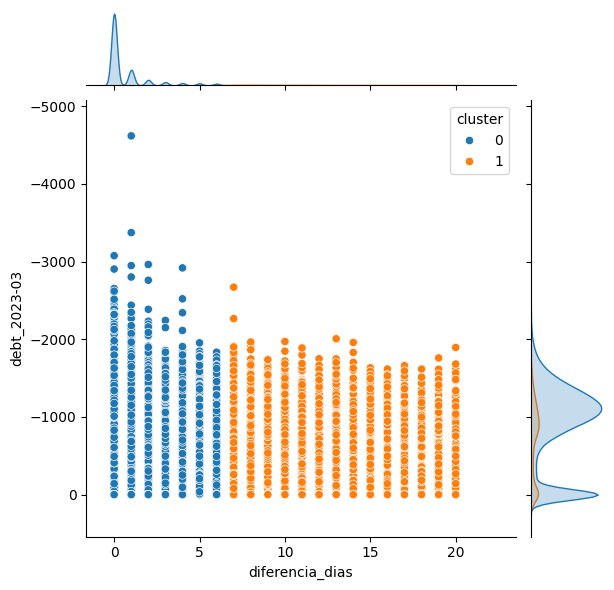

In [27]:
sns.jointplot(data=df_mayoria_70_20,x='diferencia_dias',y='debt_2023-03',hue='cluster')
plt.gca().invert_yaxis()
plt.show()

In [28]:
df_mayoria_70_20.groupby('cluster')['debt_2023-03'].sum()

cluster
0   -25558785.10
1    -2488264.32
Name: debt_2023-03, dtype: float64

In [29]:
df_mayoria_70_20_7 = courier_debt[courier_debt['diferencia_dias']<=7]
kmeans = KMeans(n_clusters=2,random_state=3)
kmeans.fit_predict(df_mayoria_70_20_7[['diferencia_dias']])
df_mayoria_70_20_7.loc[:, 'cluster']= kmeans.labels_
df_mayoria_70_20_7['cluster'].value_counts()

cluster
0    25609
1     2909
Name: count, dtype: int64

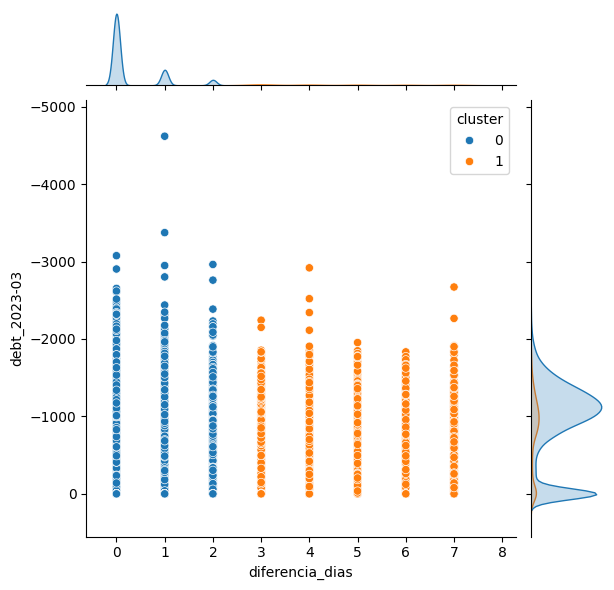

In [30]:
sns.jointplot(data=df_mayoria_70_20_7,x='diferencia_dias',y='debt_2023-03',hue='cluster')
plt.gca().invert_yaxis()
plt.show()

In [31]:
df_mayoria_70_20_7.groupby('cluster')['debt_2023-03'].sum()

cluster
0   -23538951.77
1    -2343764.72
Name: debt_2023-03, dtype: float64

In [32]:
df_mayoria_70_20_7.groupby('cluster')['debt_2023-03'].sum()

cluster
0   -23538951.77
1    -2343764.72
Name: debt_2023-03, dtype: float64

In [33]:
df_mayoria_70_20_7[(df_mayoria_70_20_7['diferencia_dias'] == 0) & (df_mayoria_70_20_7['debt_2023-03'] < -450)]


,rider_id,first_online_date,vehicle_type,last_online_date,debt_2022-10,debt_2022-11,debt_2022-12,debt_2023-01,debt_2023-02,debt_2023-03,diferencia_dias,cluster
862,id_5764607694283476374,2022-09-16,motorcycles,2022-09-16,-519.13,-519.13,-519.13,-519.13,-519.13,-519.13,0,0
1275,id_5764607781734714774,2022-10-12,motorcycles,2022-10-12,0.00,-767.38,-767.38,-767.38,-767.38,-767.38,0,0
2225,id_5764608206890339357,2023-02-01,bicycles,2023-02-01,0.00,0.00,0.00,0.00,-840.40,-840.40,0,0
2801,id_5764608488072285658,2023-01-22,motorcycles,2023-01-22,0.00,0.00,0.00,0.00,-959.30,-959.30,0,0
3105,id_5764608645522261480,2022-09-19,motorcycles,2022-09-19,-1079.61,-1079.61,-1079.61,-1079.61,-1079.61,-1079.61,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
50181,id_5764642702905837168,2023-02-26,bicycles,2023-02-26,0.00,0.00,0.00,0.00,0.00,-1534.42,0,0
50188,id_5764642705585997731,2023-02-25,bicycles,2023-02-25,0.00,0.00,0.00,0.00,0.00,-1338.78,0,0
50189,id_5764642706227726461,2023-02-25,bicycles,2023-02-25,0.00,0.00,0.00,0.00,0.00,-1010.06,0,0
50190,id_5764642706244503728,2023-03-01,bicycles,2023-03-01,0.00,0.00,0.00,0.00,0.00,-1173.70,0,0


Con estas segmentaciones, podemos notar que hay una gran cantidad de riders que en el día 0 tienen una deuda entre 1000 a 2000 pesos y que acumulan 

Segmentaremos de la siguiente forma:
- Grupo a: Rider trabajando entre 0 y 7 días con deuda de más de 450 pesos
- Grupo b: Rider con deuda entre 0 y 450 (pueden ser inactivos o buenos riders)
- Grupo c: Rider trabajando más de 8 días y con deuda de más de 450 pesos

In [34]:
a = courier_debt[(courier_debt['diferencia_dias'] <=7) & (courier_debt['debt_2023-03']<-450)]

In [35]:
b = courier_debt[(courier_debt['diferencia_dias'] >= 8 ) & (courier_debt['debt_2023-03']<-450)]

In [36]:
c = courier_debt[courier_debt['debt_2023-03']>=-450]

In [37]:
len(a)+len(b)+len(c)

50202

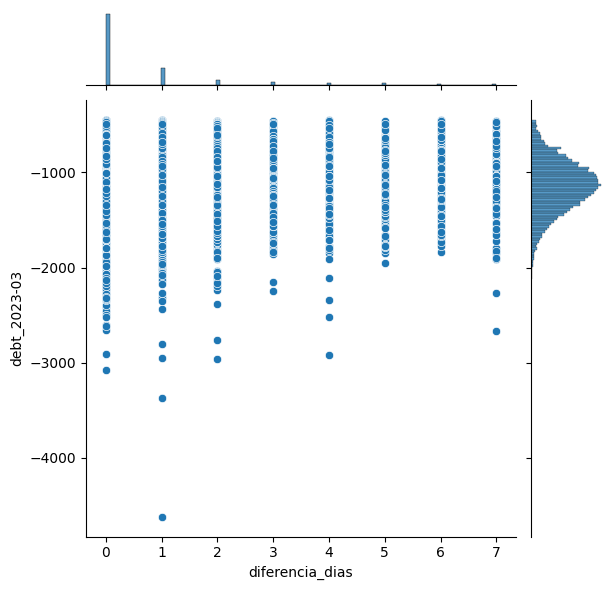

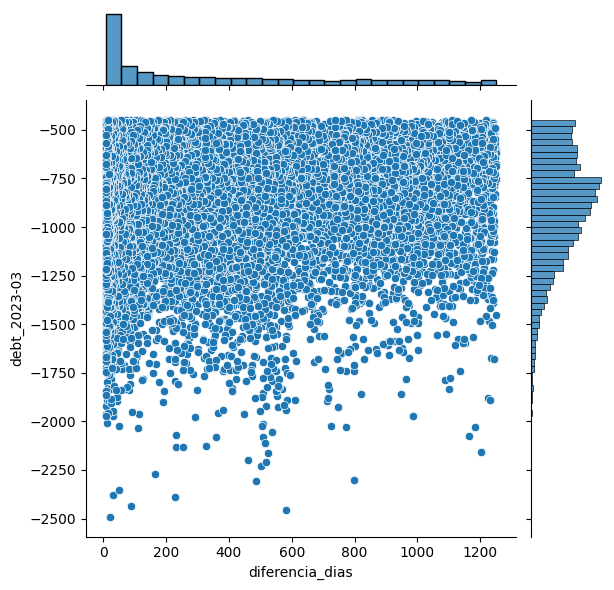

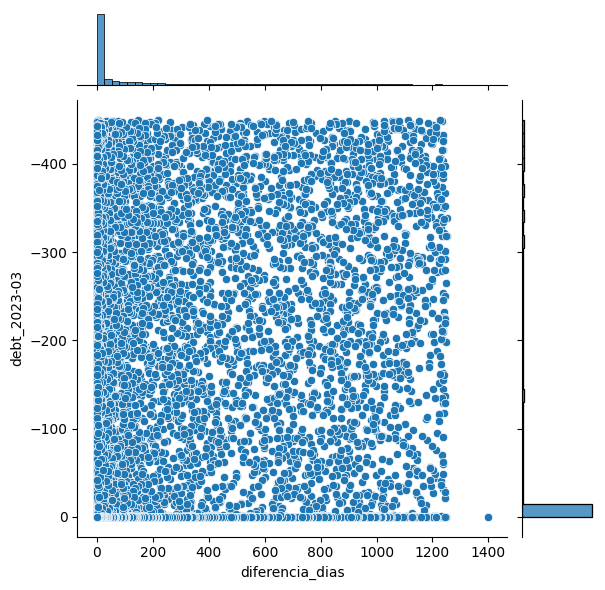

In [38]:
sns.jointplot(data=a,x='diferencia_dias',y='debt_2023-03')
sns.jointplot(data=b,x='diferencia_dias',y='debt_2023-03')
sns.jointplot(data=c,x='diferencia_dias',y='debt_2023-03')
plt.gca().invert_yaxis()
plt.show()

In [40]:
a['rider_id']

777      id_5764607677158133581
862      id_5764607694283476374
1275     id_5764607781734714774
1556     id_5764607882574171904
1824     id_5764608007988052957
                  ...          
50188    id_5764642705585997731
50189    id_5764642706227726461
50190    id_5764642706244503728
50191    id_5764642706340970928
50192    id_5764642706374524970
Name: rider_id, Length: 22307, dtype: object

Unir comportamiento de estos riders en la base de asignados o de ordenes completadas

Para las medidas, analizar la cantidad